<a href="https://colab.research.google.com/github/efthymios19/HYDRUS_GoogleColab/blob/main/Examples/Hydrus_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Παραδείγμα 2 HYDRUS

In [ ]:
!rm -rf /content/Phydrus_GoogleColab
# Clone the repository
!git clone https://github.com/efthymios19/Phydrus_GoogleColab.git

# Make the mf6 file executable
!chmod +x /content/Phydrus_GoogleColab/bin/hydrus_1

# To avoid some Google Colab unconvenients
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



Cloning into 'Phydrus_GoogleColab'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 54 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 774.32 KiB | 3.12 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
!pip install phydrus

In [ ]:
import phydrus as ps
import pandas as pd
%matplotlib inline

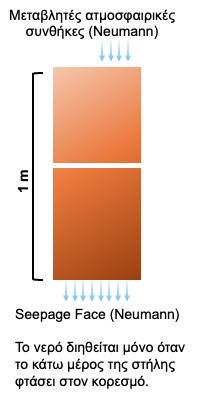

In [ ]:
# Folder for Hydrus files to be stored
ws = '/content/Phydrus_GoogleColab/modelFiles' #use particular names
exe = '/content/Phydrus_GoogleColab/bin/hydrus_1'

# Description
desc = "Infiltration of Water into a Two-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc,
              mass_units="mmol", time_unit="days", length_unit="cm")

ml.basic_info["lFlux"] = True # Αν θέλουμε ο κώδικας να τυπώσει τις ροές για κάθε στοιχείο παρατήρησης (True)

ml.basic_info["lShort"] = False # Οι πληροφορίες τυπώνονται για κάθε χρονικό βήμα (False)

time = [2, 4, 5, 6, 10, 20]
ml.add_time_info(tmax=20, print_array=time, dt=0.001, dtmax=0.1)

# tmax (int, optional) – Τελικός χρόνος της προσομοίωσης [T].
# print_array (array of float, optional) – Μία λίστα με προκαθορισμένα χρονικά σημεία όπου ο κώδικας τυπώνει.
# dt (float, optional) – Η αρχική προσαύξηση χρόνου [T]. Για προβλήματα με υψηλές πιέσεις (π.χ. διήθηση σε αρχικά ξηρό εδαφικό μεσό)
# το dt πρέπει να είναι αρκετά μικρό.


INFO: Directory /content/Phydrus_GoogleColab/modelFiles created
INFO:phydrus.model:Directory /content/Phydrus_GoogleColab/modelFiles created


[2, 4, 5, 6, 10, 20]

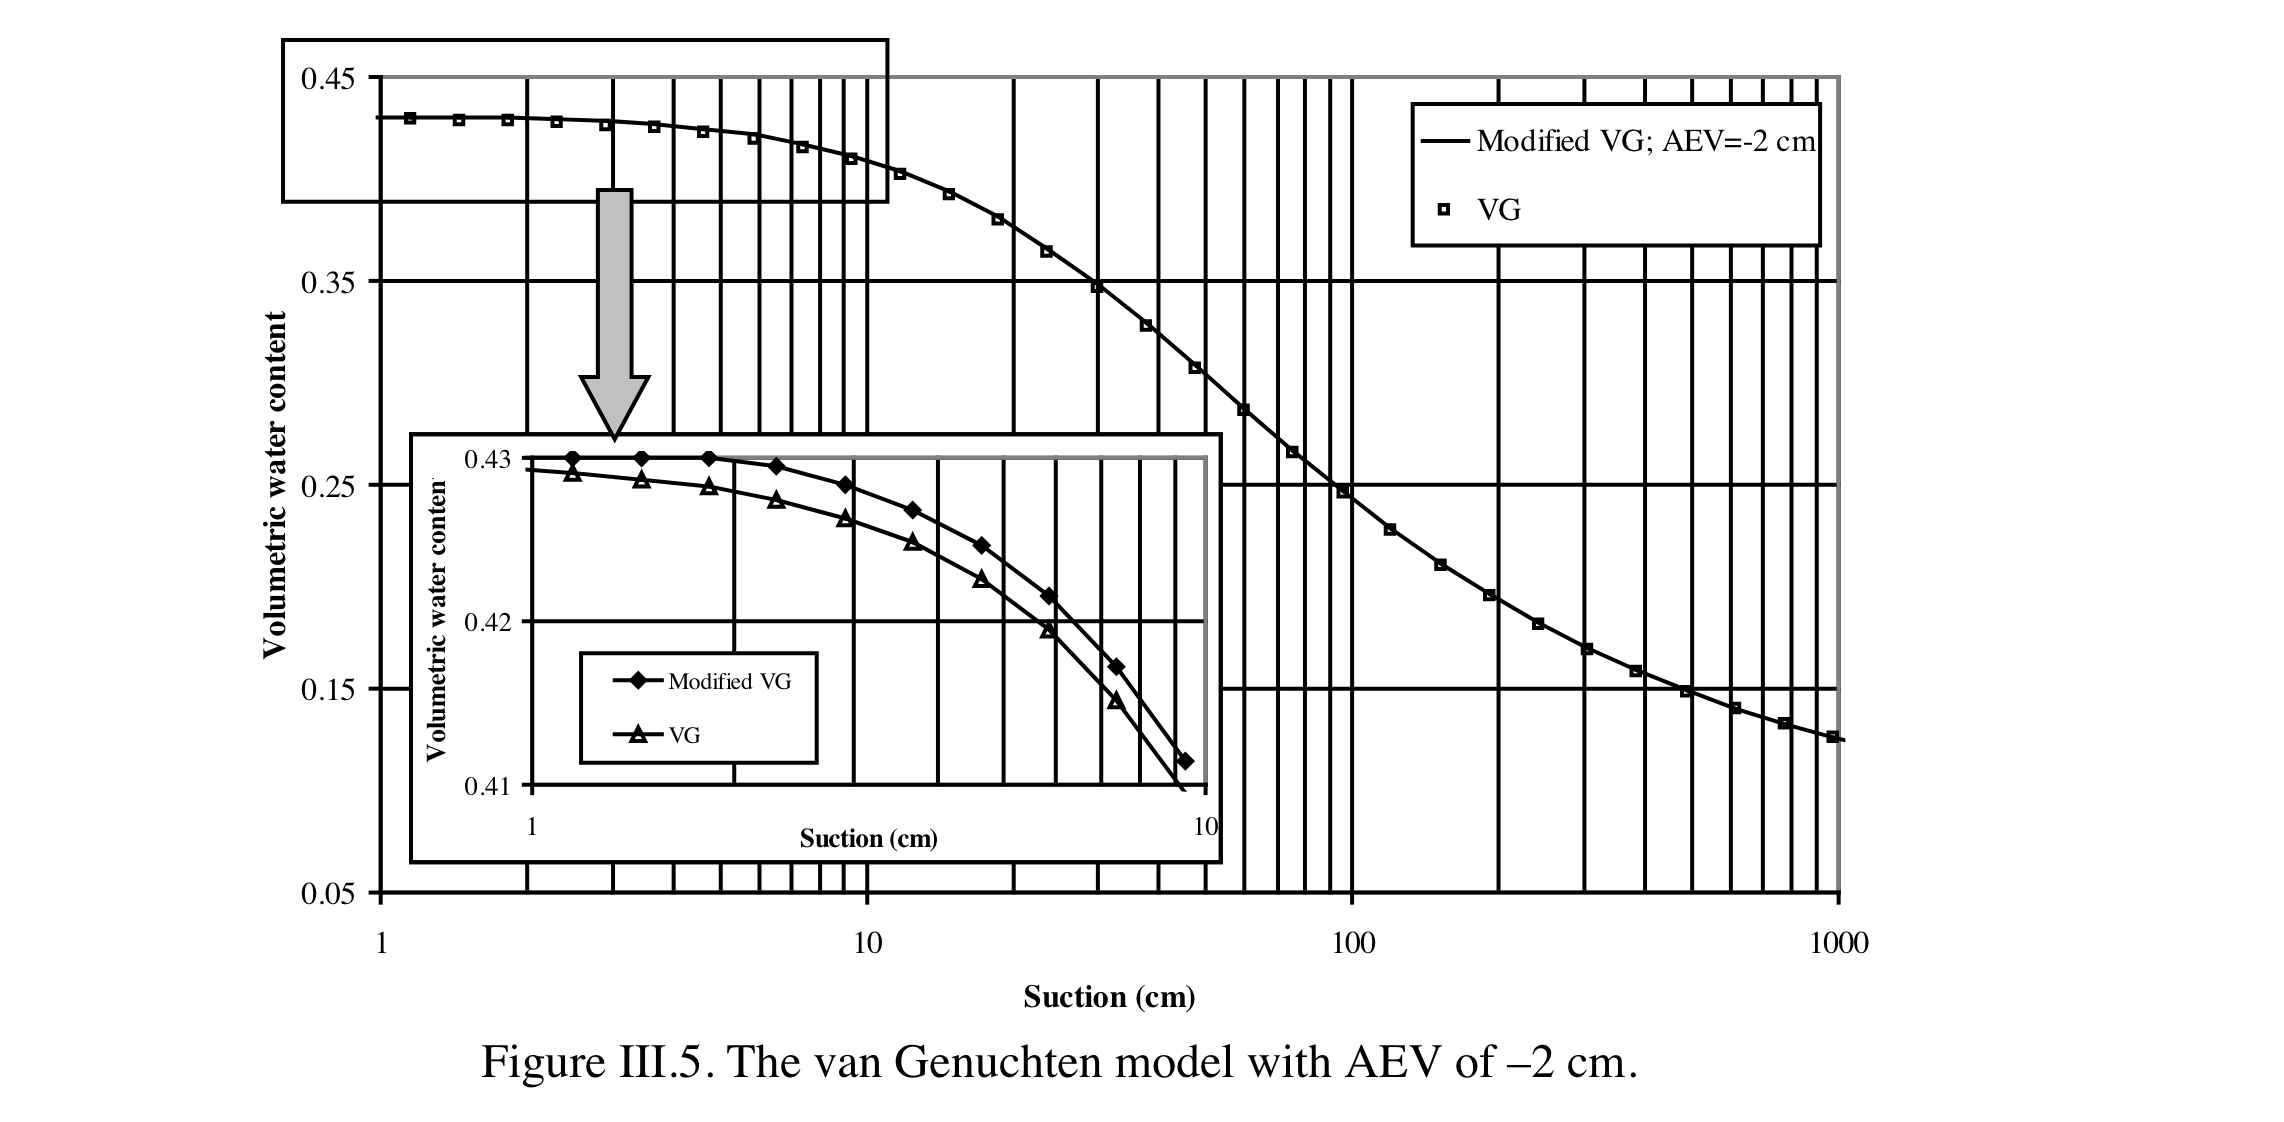

In [ ]:
ml.add_waterflow(model=3, top_bc=2, bot_bc=6)  # model (int, optional) – Παραμετρικό μοντέλο: 3 = van Genuchten"s [1980] model with air-entry value of -2 cm with 6 parameters
                                               # Στην ουσία υποχρεώνει την κλίση της καμπύλης [Υδατοχωρητικότητα] να είναι 0 κοντά στον κορεσμό
                                               # Προτείνεται για λεπτομερή εδάφη με μικρές τιμές n.
                                               # Επιλέγεται επειδή έχουμε συνθήκες κορεσμού μέσω ponding στην επιφάνεια του εδάφους
                                               # top_bc (int, optional) – Οριακή συνθήκη στο ανώτερο τμήμα της στήλης: 2 = Atmospheric Boundary Condition with Surface Layer
                                               # bot_bc (int, optional) – Οριακή συνθήκη στο κατώτερο τμήμα της στήλης: 6 = Seepage Face

m = ml.get_empty_material_df(n=2)
m.loc[[1, 2]] = [[0.095, 0.41, 0.019, 1.31, 6.24, 0.5],# Κατά σειρά:  θr, θs, α, n, Ks f, l
                 [0.065, 0.41, 0.075, 1.89, 106.1, 0.5]]
ml.add_material(m)

In [ ]:
nodes = 100  # Διακριτοποίηση της στήλης σε 100 σημεία
depth = [-51, -100]  # Βάθος της εδαφικής στήλης
ihead = -100  # Καθορισμός αρχικών συνθηκών πίεσης (τριχοειδές δυναμικό)

# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth[-1] / nodes), h=ihead, mat=m.index)
ml.add_profile(profile)  # Add the profile

/usr/local/lib/python3.11/dist-packages/phydrus/profile.py:73: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna("")


In [ ]:
# Add observation nodes at depth
ml.add_obs_nodes([0, -50, -100])

In [ ]:
time = (2, 5, 7, 10, 20) # Χρονικοί δείκτες

bc = {"tAtm": time, "Prec": (6, 10, 2, 0, 0), "rSoil": (0, 0, 0, 0, 1)} #Λεξικό με στήλες Χρόνο, Κατακρήμνιση, Εξάτμιση

# Μετατροπή του λεξικού σε dataframe με δείκτη το χρόνο
atm = pd.DataFrame(bc, index=time)

ml.add_atmospheric_bc(atm, hcrits=3, hcrita=50000)


In [ ]:
ml.write_input()

INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/SELECTOR.IN
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/SELECTOR.IN
INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/PROFILE.DAT
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/PROFILE.DAT
INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/ATMOSPH.IN
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/ATMOSPH.IN


Στο συγκεκριμένο παράδειγμα βλέπουμε την προοδευτική εξέλιξη του υγρού μετώπου διαμέσω δύο ξεχωριστών επιπέδων και υπολογίζει τις επικρατούσες ροές.  

In [ ]:
ml.simulate()

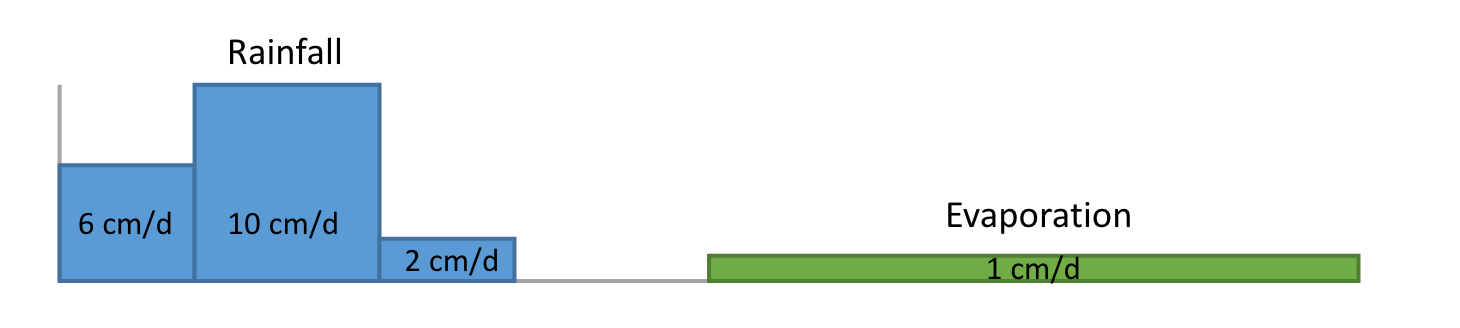

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:259: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = read_csv(path, skiprows=start, index_col=0, nrows=end - start - 1,


(-100.0, 10.0)

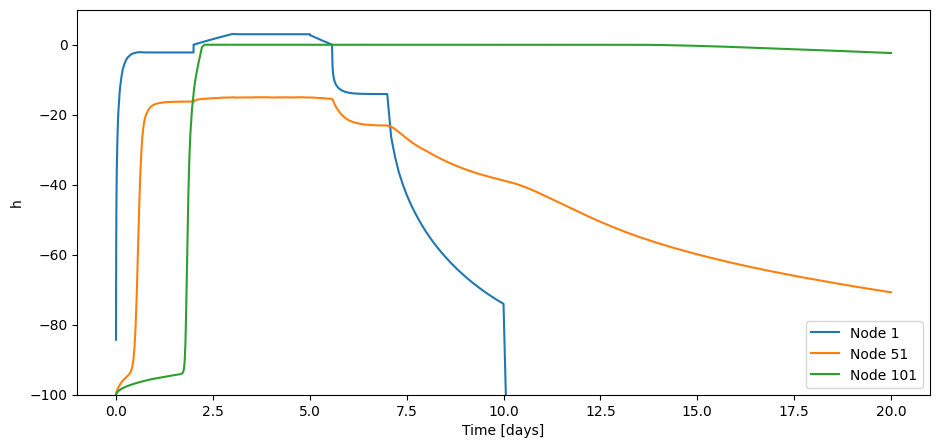

In [ ]:
import matplotlib.pyplot as plt
dfs = ml.read_obs_node()
fig, ax = plt.subplots(figsize=(11,5))
for i, df in dfs.items():
    name = "Node {}".format(i)
    df.plot(y="h", ax=ax, label=name, use_index=True)
ax.set_xlabel("Time [{}]".format(ml.basic_info["TUnit"]))
ax.set_ylabel("h")
ax.set_ylim(-100, 10)

*   Το φορτίο πίεσης στο στοιχείο 1 (0  cm) γίνεται θετικό (συνθήκες κορεσμού) μετά από δύο μέρες όταν η κατακρήμνιση (10 cm/day) υπερβάινει την Ksat (6.24 cm/day) του πρώτου επιπέδου (Clay Loam).
*   To φορτίο πίεσης συνεχίζει να ανεβαίνει έως ότου φτάσει το όριο των 3 cm και έκτοτε (3η ημέρα) αρχίσει η επιφανειακή απορροή.
*    Μεταξύ της ημέρας 3 - 5 η εδαφική στήλη έχει σταθερές συνθήκες.
*    Όταν η κατακρήμνιση πέφτει κάτω από την Ksat(6.24 cm/day) του πρώτου επιπέδου (Clay Loam) την ημέρα 5, η κατακρήμνιση που είχε αποθηκεύθει στο επιφανειακό επίπεδο σταδιακά διηθείται στην εδαφική στήλη και η επιφάνεια του εδάφους γίνεται ξανά ακόρεστη.
*    Μετά το τέλος της κατακρήμνισης (> 7 ημέρα) και πρίν την ενεργοποίηση της εξάτμισης (την ημέρα 11), τα φορτία πίεσης στην εδαφική στήλη συνεχίζουν να μειώνονται ως αποτελέσμα της στράγγισης λόγω της βαρύτητας. Κατά τη διάρκεια αυτής της περιόδου, η κατώτερη οριακή συνθήκη παραμένει κορεσμένη και το νερό συνεχίζει να στραγγίζει από το κάτω όριο της εδαφικής στήλης διαμέσω του seepage face.
*    Την ημέρα 11, η εξάτμιση ενεργοποιείται και έτσι η εδαφική στήλη αρχίζει να στραγγίζει με μεγαλύτερο ρυθμό. Το φορτίο πίεσης στην επιφανεία του εδάφους φτάνει την ελάχιστη επιτρεπόμενη πίεση "hCritA" -50.000 cm νερού (Αλλαγή ylim). H διαδικασία ξήρανσης εξελίσσεται στην εδαφική στήλη έως ότου φτάσει το κατώτερο όριο στις 13.4 ημέρες. Στο σημείο αυτό, η οριακή συνθήκη γίνεται ακόρεστη και η ροή σταματά (Aλλαγή ylim).  



/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,


<Axes: xlabel='h [cm]', ylabel='Depth [cm]'>

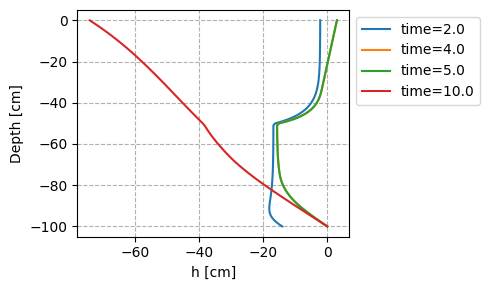

In [ ]:
ml.plots.profile_information(times=[2.0, 4.0, 5.0, 10.0])

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,


<Axes: xlabel='Theta [-]', ylabel='Depth [cm]'>

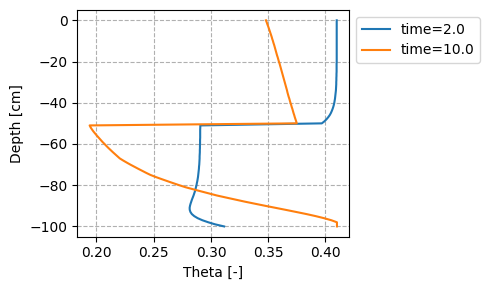

In [ ]:
ml.plots.profile_information("Water Content", times=[2.0, 10.0])

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:214: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = read_csv(file, skiprows=s, nrows=e - s - 2, usecols=usecols,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.drop(index=data.index[0]).apply(to_numeric,


array([<Axes: xlabel='Time [days]', ylabel='Bottom Flux'>,
       <Axes: xlabel='Time [days]', ylabel='Cum. Bottom Flux'>],
      dtype=object)

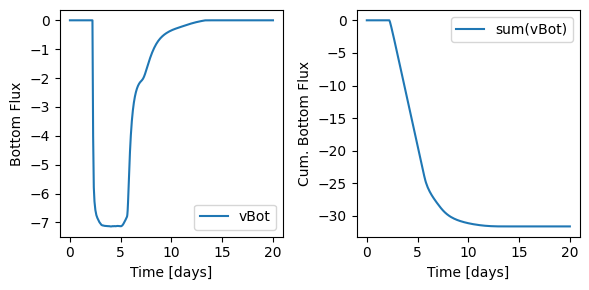

In [ ]:
ml.plots.water_flow(data="Bottom Flux")